In [1]:
from pv_analyzer import pv_analyze
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
%matplotlib widget

In [3]:
def emp_kep_v(v_rot, v_100):        
        r_au = 100.*np.power(v_100/v_rot, 2)
        return r_au

def emp_kep_r(r, r_b, v_100):
        v_r = v_100*(r/r_b)**(-0.5)
        return v_r

In [4]:
# define fix r points
# Get equidistance points

r_au_empkep_rs_fix_r = np.arange(start=42., step=42., stop=840.)
r_au_empkep_bs_fix_r = -r_au_empkep_rs_fix_r

v_100 = 2.842 #kmps # idpft-2.674 # JS- 3.2 # newft 2.842

v_rot_empkep_rs_fix_r =  emp_kep_r(r=r_au_empkep_rs_fix_r, r_b=100., v_100=v_100)
v_rot_empkep_bs_fix_r = - v_rot_empkep_rs_fix_r

plot_points = [r_au_empkep_rs_fix_r, v_rot_empkep_rs_fix_r, r_au_empkep_bs_fix_r, v_rot_empkep_bs_fix_r]

In [5]:
# Evaluate empirical keplerian curve function
r_rs_func = np.arange(start=1., step=0.5, stop=840.)   # Note that this is in AU
v_rs_func = emp_kep_r(r=r_rs_func, r_b=100., v_100=v_100)

r_bs_func = -r_rs_func
v_bs_func = -v_rs_func

In [10]:
pv_without_beam_fname = "L1489irs_model_i_73.0without_beam_conv_pv.fits"

pv_with_beam_fname = "L1489irs_model_i_73.0with_beam_conv_pv.fits"

pv_with_beam = pv_analyze(pv_path=pv_with_beam_fname,
                    is_Tb=False, v_sys=7.27) # V_sys - 7.22, 7.27 7.33
pv_with_beam.read_pv(print_details = True)

#Tb_pv_with_beam = pv_with_beam.get_tb_on_curve(curve_function = plot_points, 
#                            get_surrounding_pix = False, mode='vals',
#                            num_pix = 3)
                           
Tb_pv_with_beam = pv_with_beam.get_tb_on_curve(curve_function = None, 
                            get_surrounding_pix = False, mode='func',
                            num_pix = 3, return_coords=True)

pv_without_beam = pv_analyze(pv_path=pv_without_beam_fname,
                    is_Tb=False, v_sys=7.27) # V_sys - 7.22, 7.27 7.33
pv_without_beam.read_pv(print_details = True)

#Tb_pv_without_beam = pv_without_beam.get_tb_on_curve(curve_function = plot_points, 
#                            get_surrounding_pix = False, mode='vals',
#                           num_pix = 3)


Tb_pv_without_beam = pv_without_beam.get_tb_on_curve(curve_function = None, 
                            get_surrounding_pix = False, mode='func',
                            num_pix = 3, return_coords=True)

Convert frequency to velocity
 rms = 1.14e-11 Jy beam$^-1$
Convert frequency to velocity
 rms = 5.28e-18 Jy beam$^-1$


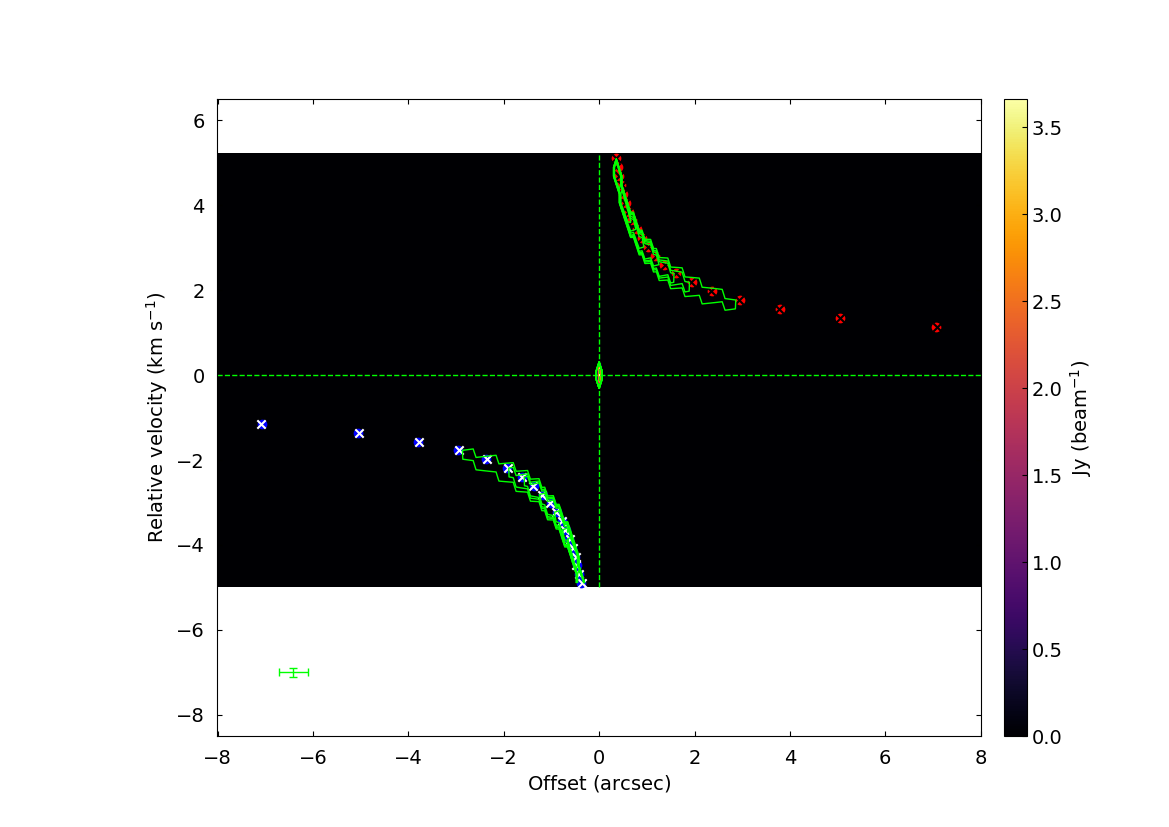

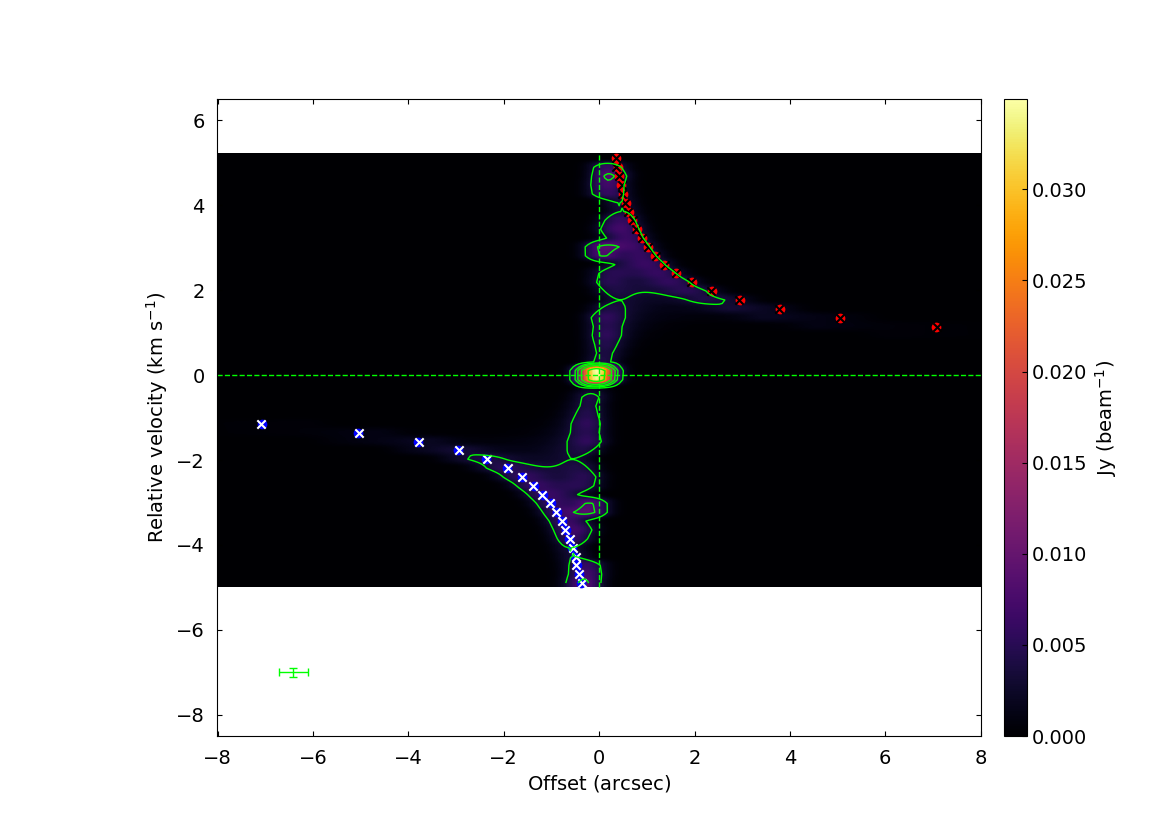

In [11]:
pv_without_beam_fig = pv_without_beam.plot_pv(plot_curve=True, base_ctr_lvl= 0.002)
pv_with_beam_fig = pv_with_beam.plot_pv(plot_curve=True, base_ctr_lvl= 0.0011)

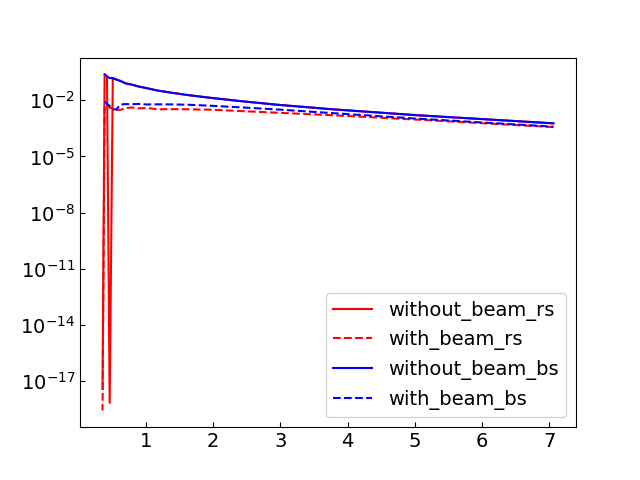

In [21]:
fig, axs = plt.subplots()

axs.plot(Tb_pv_without_beam["r_rs"], Tb_pv_without_beam["Tb_on_point_rs"], label='without_beam_rs', c='r', ls = '-')
axs.plot(Tb_pv_with_beam["r_rs"], Tb_pv_with_beam["Tb_on_point_rs"], label='with_beam_rs', c='r', ls = '--')

axs.plot(-Tb_pv_without_beam["r_bs"], Tb_pv_without_beam["Tb_on_point_bs"], label='without_beam_bs', c='b', ls = '-')
axs.plot(-Tb_pv_with_beam["r_bs"], Tb_pv_with_beam["Tb_on_point_bs"], label='with_beam_bs', c='b', ls = '--')
axs.legend()
axs.set_yscale('log')
plt.show()

[0.0005774828605353832, 0.001547504565678537, 0.003196476958692074, 0.00566811254248023, 0.009179876185953617, 0.013618884608149529, 0.018839387223124504, 0.025330400094389915, 0.032561078667640686, 0.04329651594161987, 0.05367688462138176, 0.06833335757255554, 0.07807008177042007, 0.10527428984642029, 0.12479765713214874, 0.15061235427856445, 7.003938320797147e-19, 0.18589137494564056, 0.23616494238376617, 3.850733373768095e-18]
[0.00036275427555665374, 0.0009044591570273042, 0.001546870218589902, 0.0021274008322507143, 0.00266686431132257, 0.003097913460806012, 0.0032465290278196335, 0.003314656438305974, 0.003228395478799939, 0.003840432036668062, 0.00363370799459517, 0.004052602220326662, 0.0037371257785707712, 0.003040134906768799, 0.0029670887161046267, 0.003685602219775319, 0.00392082380130887, 0.00618847506120801, 0.0047318460419774055, 2.7755574995243454e-19]


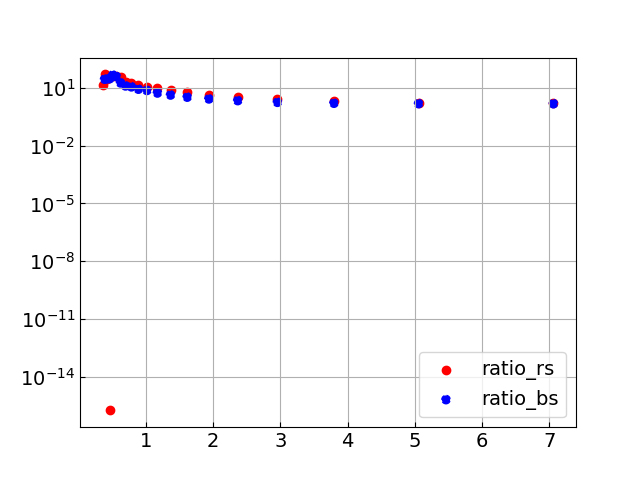

In [26]:
red_factor = np.divide(Tb_pv_without_beam["Tb_on_point_rs"],Tb_pv_with_beam["Tb_on_point_rs"])

print(Tb_pv_without_beam["Tb_on_point_rs"])
print(Tb_pv_with_beam["Tb_on_point_rs"])
blue_factor = np.divide(Tb_pv_without_beam["Tb_on_point_bs"],Tb_pv_with_beam["Tb_on_point_bs"])

fig, axs = plt.subplots()

axs.scatter(Tb_pv_without_beam["r_rs"], red_factor, label='ratio_rs', c='r', ls = '-')
axs.scatter(-Tb_pv_with_beam["r_bs"], blue_factor, label='ratio_bs', c='b', ls = '--')

axs.legend()
axs.set_yscale('log')
axs.grid()
plt.show()

In [ ]:
# planck function
def Bv(T,v):
    '''
    Planck function

    Args:
        T: temprature [K]
        v: frequency [GHz]
    '''
    v     = v * 1.e9 # GHz --> Hz
    exp   = np.exp((hp*v)/(kb*T))-1.0
    fterm = (2.0*hp*v*v*v)/(clight*clight)
    Bv    = fterm/exp
    return Bv

def calc_column_cont(Iv, freq, bmaj, bmin, T, kappa, dist=140.,
 Rg_to_d=100., mu=2.8, number=False, err_Iv=0.):
    '''
    Calculate dust column density assuming optically thin and temperature.

    Args:
        Iv: intensity [Jy/beam]
        freq: frequency [GHz]
        bmaj, bmin: [arcsec]
        T: temperature [K]
        kappa: dust opacity [cm2 g-1]. Note that this opacity is
               assumed to be an opacity for dust mass.
        dist: distance to the object [pc]
        Rd_to_g: gas-to-dust mass ratio
        mu: mean molecular weight. Default mu=2.8 derives
         correct column number density of H2 gas (Kauffman+08).
    '''
    print ('')
    print ('Input values')
    print ('Beam size: %.2f x %.2f arcsec'%(bmaj,bmin))
    print ('Frequency: %.6e GHz'%freq)
    print ('temperature: %.2f K'%T)

    # convert units
    bmaj = bmaj*np.pi/(180.*60.*60.) # arcsec --> radian
    bmin = bmin*np.pi/(180.*60.*60.) # arcsec --> radian

    # Jy/beam -> Jy/str
    # Omg_beam (str) = (pi/4ln(2))*beam (rad^2)
    # I [Jy/beam] / Omg_beam = I [Jy/str]
    # beam area = Omega_beam x d^2
    C2     = np.pi/(4.*np.log(2.)) # beam(rad) -> beam (sr)
    bTOstr = bmaj*bmin*C2          # beam --> str

    Istr = Iv/bTOstr       # Jy/beam --> Jy/str
    Istr = Istr*1.0e-26    # Jy --> MKS (Jy = 10^-26 Wm-2Hz-1)
    Istr = Istr*1.e7*1.e-4 # MKS --> cgs (erg s^-1 cm^-2 Hz^-1 str^-1)
    err_Istr = err_Iv/bTOstr
    err_Istr = err_Istr*1.0e-26*1.e7*1.e-4

    # column density (of gas or dust depending on kappa)
    Sigma     = Istr/(Bv(T,freq)*kappa) # g cm^-2
    Sigma_gas = Sigma*Rg_to_d           # g cm^-2
    N_H2      = Sigma_gas/(mu*mH)

    # Error propagation
    dSig_dIv   = Sigma/Istr
    err_Sig    = np.sqrt( (dSig_dIv*err_Istr)**2. )
    err_Siggas = np.sqrt( (dSig_dIv*err_Istr)**2. )*Rg_to_d
    err_NH2    = err_Siggas/(mu*mH)

    print ('')
    print ('Output')
    if number:
        print ('N_H2: %.4e cm^-2'%N_H2)
        print ('Uncertainty: %.4e cm^-2'%err_NH2)
        return N_H2
    else:
        print ('Sigma_dust: %.4e g cm^-2'%Sigma)
        print ('Uncertainty: %.4e g cm^-2'%err_Sig)
        print ('Sigma_gas: %.4e g cm^-2'%Sigma_gas)
        return Sigma_gas